In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [2]:
fotocasa = pd.read_csv("fotocasa.csv")

# Missing values

In [3]:
fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 > 0]/len(fotocasa)*100

Antiquity             62.236332
Bathrooms              0.667241
Community_Expenses    53.971158
Condition             51.571244
Deposit               81.403358
Elevator              27.152389
Extra                  3.067155
Floor                 33.921653
Furnished             31.887645
Heating               62.892811
Orientation           75.086096
Parking               78.486870
Pets                  93.133879
Rooms                  5.768403
Size                   0.548859
Water_Heater          69.371502
dtype: float64

In [4]:
cleaned_columns = len(fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 == 0])
print("There are ", cleaned_columns-4, " cleaned columns:")
print(fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 == 0].index)

There are  4  cleaned columns:
Index(['Emissions', 'Energy_Consumption', 'Neighborhood', 'Photos', 'Price',
       'Title', 'Type', 'url'],
      dtype='object')


# Price

In [5]:
def clean_price(x):
    if x!= "A consultar":
        return x.replace(".","").rstrip("€")
    else:
        return np.nan
fotocasa["Price"].apply(clean_price).isna().sum()

8

In [6]:
fotocasa["Price"] = fotocasa["Price"].apply(clean_price)
fotocasa = fotocasa.dropna(axis=0, subset = ["Price"])
fotocasa["Price"] = fotocasa["Price"].astype(int)

# Getting district and borough

In [7]:
districts = ["Centro","Arganzuela","Retiro","Salamanca","Chamartín","Tetuán","Chamberí","Fuencarral",
             "Moncloa","Latina","Carabanchel","Usera","Puente de Vallecas","Moratalaz","Ciudad Lineal",
             "Hortaleza","Villaverde","Villa de Vallecas","Vicálvaro","San Blas","Barajas"]
boroughs = ["El Pardo", "Fuentelareina", "Peñagrande", "Pilar", "La Paz", "Valverde", "Mirasierra",
                "El Goloso", "Casa de Campo", "Argüelles", "Ciudad Universitaria", "Valdezarza", 
                "Valdemarín", "El Plantío", "Aravaca", "Bellas Vistas", "Cuatro Caminos", "Castillejos", 
                "Almenara", "Valdeacederas", "Berruguete", "Palomas", "Piovera", "Canillas", 
                "Pinar del Rey", "Apóstol Santiago", "Valdefuentes", "El Viso", "Prosperidad", 
                "Ciudad Jardín", "Hispanoamérica", "Nueva España", "Castilla", "Ventas", "Pueblo Nuevo", 
                "Quintana", "Concepción", "San Pascual", "San Juan Bautista", "Colina", "Atalaya", 
                "Costillares", "Gaztambide", "Arapiles", "Trafalgar", "Almagro", "Ríos Rosas", 
                "Vallehermoso","Recoletos", "Goya", "Fuente del Berro", "Guindalera", "Lista", 
                "Castellana", "Simancas", "Hellín", "Amposta", "Arcos", "Rosas", "Rejas", "Canillejas", 
                "Salvador", "Alameda de Osuna", "Aeropuerto", "Casco Histórico de Barajas", "Timón", 
                "Corralejos", "Palacio", "Embajadores", "Cortes", "Justicia", "Universidad", "Sol", 
                "Pacífico", "Adelfas", "Estrella", "Ibiza", "Jerónimos", "Niño Jesús", "Imperial", 
                "Acacias", "Chopera", "Legazpi", "Delicias", "Palos de Moguer", "Atocha", "Pavones", 
                "Horcajo", "Marroquina", "Media Legua", "Fontarrón", "Vinateros", "Villaverde Alto", 
                "San Cristobal", "Butarque", "Los Rosales", "Los Ángeles", "Orcasitas", "Orcasur", 
                "San Fermín", "Almendrales", "Moscardó", "Zofío", "Pradolongo", "Cármenes", 
                "Puerta del Ángel", "Lucero", "Aluche", "Campamento", "Cuatro Vientos", "Águilas", 
                "Comillas", "Opañel", "San Isidro", "Vista Alegre", "Puerta Bonita", "Buenavista", 
                "Abrantes", "Casco Histórico de Vicálvaro", "Valdebernardo", "Valderrivas", "El Cañaveral",
                "Entrevías", "San Diego", "Palomeras Bajas", "Palomeras Sureste", "Portazgo", "Numancia",
                "Casco Histórico de Vallecas", "Santa Eugenia", "Ensanche de Vallecas"]

In [8]:
from unidecode import unidecode

def get_district(x):
    comparison = [unidecode(i).lower() in unidecode(x).lower() for i in districts]
    try: 
        idx = comparison.index(True)
        return districts[idx]
    except:
        return np.nan
fotocasa["District"] = fotocasa["Neighborhood"].apply(get_district)
print("There are ", fotocasa["District"].isna().sum(), " missing value(s)")

There are  35  missing value(s)


In [9]:
def get_borough(x):
    comparison = [unidecode(i).lower() in unidecode(x).lower() for i in boroughs]
    try: 
        idx = comparison.index(True)
        return boroughs[idx]
    except:
        return np.nan
fotocasa["Borough"] = fotocasa["Title"].apply(get_borough)
print("There are ", fotocasa["Borough"].isna().sum(), " missing value(s)")

There are  338  missing value(s)


In [10]:
# Seeing missing boroughs
def clean_title(x):
    return x.split(",")[-1].split(" ")[-1]
missing_boroughs = fotocasa.loc[fotocasa["Borough"].isna(),"Title"].apply(clean_title).to_list()
missing_boroughs_dict = {}
for missing in missing_boroughs:
    if missing in missing_boroughs_dict:
        missing_boroughs_dict[missing] += 1
    else:
        missing_boroughs_dict[missing] = 1
{k: v for k, v in sorted(missing_boroughs_dict.items(), key=lambda item: item[1], reverse = True)}

{'Sanchinarro': 97,
 'Tablas': 60,
 'Capital': 36,
 'Manoteras': 34,
 'Villaverde': 30,
 'Carabanchel': 29,
 'Montecarmelo': 20,
 'Fresno': 10,
 'Ambroz': 10,
 'Plantío': 9,
 'Fuentelarreina': 2,
 'Usera': 1}

In [11]:
def get_borough(x):
    x = x.replace("  "," ")
    if "Sanchinarro".lower() in x.lower():
        return "Valdefuentes"
    elif "Tablas".lower() in x.lower():
        return "Valverde"
    elif unidecode("San Andrés de Villaverde").lower() in unidecode(x).lower():
        return "Villaverde Alto"
    elif "Montecarmelo".lower() in x.lower():
        return "El Goloso"
    elif "Manoteras".lower() in x.lower():
        return "Apóstol Santiago"
    elif "PAU" in x:
        return "Buenavista"
    elif "Ambroz".lower() in x.lower():
        return "Casco Histórico de Vicálvaro"
    elif "Arroyo del Fresno".lower() in x.lower():
        return "Mirasierra"
    elif "Fuentelarreina".lower() in x.lower():
        return "Fuentelareina"
    elif "Valderribas".lower() in x.lower():
        return "Valderrivas"
    else:
        comparison = [unidecode(i).lower() in unidecode(x).lower() for i in boroughs]
        try: 
            idx = comparison.index(True)
            return boroughs[idx]
        except:
            return np.nan
fotocasa["Borough"] = fotocasa["Title"].apply(get_borough)
print("There are ", fotocasa["Borough"].isna().sum(), " missing value(s)")

There are  37  missing value(s)


In [12]:
titles = fotocasa.loc[fotocasa["Borough"].isna(),"Title"].values
for title in titles:
    print(title)

Piso de alquiler en Usera
Piso de alquiler en Calle Calle de Cartagena, 87  Madrid Capital
Loft de alquiler en Calle Miguel Yuste, 21  Madrid Capital
Piso de alquiler en Calle Calle de Marcelino Roa Vázquez, 51  Madrid Capital
Ático de alquiler en Calle de Santa Eulalia, 12  Madrid Capital
Piso de alquiler en Calle de Los Ceramistas, 2  Madrid Capital
Piso de alquiler en Calle Calle de Padilla, 67  Madrid Capital
Piso de alquiler en Paseo Paseo de Santa María de la Cabeza, 16  Madrid Capital
Piso de alquiler en Calle Calle de Corazón de María, 57  Madrid Capital
Piso de alquiler en Calle Morejón, 8  Madrid Capital
Piso de alquiler en Calle Fuencarral, 43  Madrid Capital
Piso de alquiler en Calle de Blasco de Garay, 63  Madrid Capital
Piso de alquiler en Calle Calle de Palomares, .  Madrid Capital
Piso de alquiler en Calle Milán, 10  Madrid Capital
Piso de alquiler en Calle Camino de la Zarzuela, 49  Madrid Capital
Piso de alquiler en Alameda Calle de Carretas, .  Madrid Capital
Piso de

In [13]:
fotocasa = fotocasa.dropna(axis=0, subset = ["District","Borough"])

# Antiquity

In [14]:
fotocasa["Antiquity"].value_counts()

30 a 50 años      715
50 a 70 años      701
10 a 20 años      529
70 a 100 años     485
+ 100 años        420
20 a 30 años      312
Menos de 1 año    125
1 a 5 años        117
5 a 10 años        91
Name: Antiquity, dtype: int64

In [15]:
def clean_antiquity(x):
    try:
        return x.rstrip(" años").replace(" ","").replace("a","-").replace("Menosde","<")
    except AttributeError:
        return x
    
fotocasa["Antiquity"] = fotocasa["Antiquity"].apply(clean_antiquity)

In [16]:
fotocasa["Antiquity"].value_counts()

30-50     715
50-70     701
10-20     529
70-100    485
+100      420
20-30     312
<1        125
1-5       117
5-10       91
Name: Antiquity, dtype: int64

### Adding missing values with the average of the borough and then district

In [17]:
for borough in fotocasa.loc[fotocasa["Antiquity"].isna(),"Borough"].unique():
    filter_borough = fotocasa["Borough"] == borough
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_borough, "Antiquity"].mode().loc[0]
        fotocasa.loc[fotocasa["Antiquity"].isna() & filter_borough,"Antiquity"] = frequent_antiquity
    except KeyError:
        pass

In [18]:
for district in fotocasa.loc[fotocasa["Antiquity"].isna(),"District"].unique():
    filter_district = fotocasa["District"] == district
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_district, "Antiquity"].mode().loc[0]
        fotocasa.loc[fotocasa["Antiquity"].isna() & filter_district,"Antiquity"] = frequent_antiquity
    except KeyError:
        pass

In [19]:
fotocasa["Antiquity"].isna().sum()

0

# Bathrooms and rooms
At least one bathroom and room per property

In [20]:
fotocasa["Bathrooms"] = fotocasa["Bathrooms"].fillna(1).astype(int)
fotocasa["Rooms"] = fotocasa["Rooms"].fillna(1).astype(int)

# Size
We will use the average size per borough as we did with the antiquity

In [21]:
for borough in fotocasa.loc[fotocasa["Size"].isna(),"District"].unique():
    filter_borough = fotocasa["Borough"] == borough
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_borough, "Size"].mean()
        fotocasa.loc[fotocasa["Size"].isna() & filter_borough,"Size"] = frequent_antiquity
    except KeyError:
        pass

In [22]:
for district in fotocasa.loc[fotocasa["Size"].isna(),"District"].unique():
    filter_district = fotocasa["District"] == district
    try:
        # Antiquity
        frequent_antiquity = fotocasa.loc[filter_district, "Size"].mode().loc[0]
        fotocasa.loc[fotocasa["Size"].isna() & filter_district, "Size"] = frequent_antiquity
    except KeyError:
        pass

In [23]:
fotocasa["Size"] = fotocasa["Size"].astype(int)

# Extras

In [24]:
all_extras = fotocasa["Extra"].fillna("").apply(lambda x: x+"-").sum().split("-")

In [25]:
extras_dict = {}
for extra in all_extras:
    if extra in extras_dict:
        extras_dict[extra] += 1
    else:
        extras_dict[extra] = 1
{k: v for k, v in sorted(extras_dict.items(), key=lambda item: item[1], reverse = True)}

{'Armarios': 6486,
 'Aire acondicionado': 5838,
 'Cocina Equipada': 5454,
 'Electrodomésticos': 4926,
 'Nevera': 4562,
 'Lavadora': 4519,
 'Calefacción': 4341,
 'Horno': 3545,
 'Puerta Blindada': 3501,
 'Parquet': 3206,
 'Microondas': 3070,
 'Serv. portería': 3005,
 'Terraza': 2114,
 'Suite ': 1609,
 ' con baño': 1609,
 'TV': 1391,
 'Trastero': 1325,
 'Balcón': 1318,
 'Cocina Office': 1272,
 'Videoportero': 1210,
 'Z. Comunitaria': 1131,
 'Internet': 1029,
 'Piscina comunitaria': 1020,
 'Lavadero': 858,
 'Piscina': 782,
 'Gres Cerámica': 732,
 'Zona Infantil': 570,
 'Ascensor interior': 532,
 'Jardín Privado': 504,
 'Patio': 490,
 'Zona Deportiva': 403,
 '': 282,
 'Baño de huéspedes': 120,
 'Gimnasio': 102,
 'Alarma': 79,
 'Domótica': 67,
 'Energía Solar': 55,
 'Cuarto para el servicio': 53,
 'Cuarto lavado plancha': 48,
 'Sauna': 28,
 'Jacuzzi': 20,
 'Pista de Tenis': 19,
 'Porche cubierto': 18,
 'Muebles de diseño': 17,
 'Bodega': 10,
 'Casa de invitados': 3,
 'Agua Caliente': 1,
 'M

In [26]:
fotocasa["Air_Conditioner"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Aire acondicionado" in x))
fotocasa["Air_Conditioner"].sum()

5838

In [27]:
fotocasa["Community_Zone"] = fotocasa["Extra"].fillna("") \
    .apply(lambda x: int(("comunitaria" in x.lower()) or ("Zona" in x)))
fotocasa["Community_Zone"].sum()

1538

In [28]:
fotocasa["Concierge"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Serv. portería" in x))
fotocasa["Concierge"].sum()

3005

In [29]:
fotocasa["Equipped_Kitchen"] = fotocasa["Extra"].fillna("") \
    .apply(lambda x: int(("Cocina Equipada" in x) or ("Electrodomésticos" in x) or ("Nevera" in x) \
                        or ("Horno" in x)))
fotocasa["Equipped_Kitchen"].sum()

7959

In [30]:
fotocasa["Ensuite"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Suite" in x))
fotocasa["Ensuite"].sum()

1609

In [31]:
fotocasa["Garden"] = fotocasa["Extra"].fillna("").apply(lambda x: int(("Jardín" in x) or ("Porche" in x)))
fotocasa["Garden"].sum()

507

In [32]:
fotocasa["Swimming_Pool"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Piscina" in x))
fotocasa["Swimming_Pool"].sum()

1383

In [33]:
fotocasa["Terrace"] = fotocasa["Extra"].fillna("").apply(lambda x: int("Terraza" in x))
fotocasa["Terrace"].sum()

2114

In [34]:
fotocasa["Len_Extras"] = fotocasa["Extra"].fillna("").apply(lambda x: len(x.split("-")))

# Furnished

In [35]:
fotocasa["Furnished"].value_counts()

Sí    4253
No    2040
Name: Furnished, dtype: int64

In [36]:
fotocasa["Furnished"] = fotocasa["Furnished"].map({"Sí": "1", "No": "0"}).fillna("0")

In [37]:
fotocasa["Furnished"].value_counts()

0    4993
1    4253
Name: Furnished, dtype: int64

# Elevator

In [38]:
fotocasa["Elevator"].value_counts()

Sí    6741
Name: Elevator, dtype: int64

In [39]:
fotocasa["Elevator"] = fotocasa["Elevator"].map({"Sí": "1", "No": "0"}).fillna("0")

In [40]:
fotocasa["Elevator"].value_counts()

1    6741
0    2505
Name: Elevator, dtype: int64

# Energy consumption and emissions

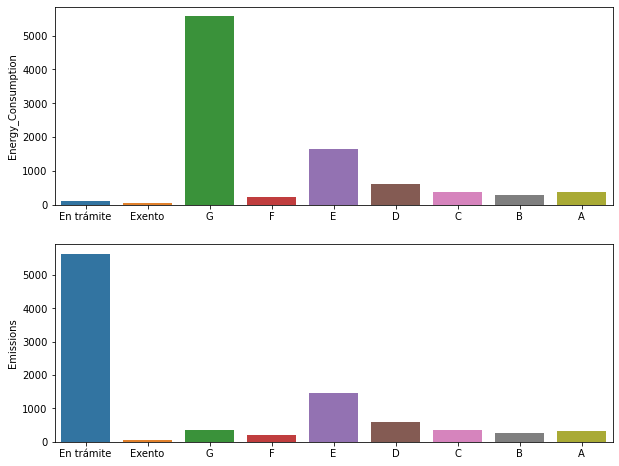

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(nrows = 2, figsize = (10,8))
sns.barplot(x = fotocasa["Energy_Consumption"].value_counts().index, 
            y = fotocasa["Energy_Consumption"].value_counts().reset_index()["Energy_Consumption"],
            order = ["En trámite", "Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[0])
sns.barplot(x = fotocasa["Emissions"].value_counts().index, 
            y = fotocasa["Emissions"].value_counts().reset_index()["Emissions"],
            order = ["En trámite", "Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[1])

In [42]:
fotocasa["Energy_Consumption"].value_counts()

G             5574
E             1642
D              613
C              370
A              366
B              282
F              234
En trámite     108
Exento          57
Name: Energy_Consumption, dtype: int64

The distribution is the same, therefore:

In [43]:
fotocasa.loc[fotocasa["Energy_Consumption"]=="En trámite","Energy_Consumption"] = \
  fotocasa.loc[fotocasa["Energy_Consumption"]=="En trámite","Emissions"]  

fotocasa.loc[fotocasa["Emissions"]=="En trámite","Emissions"] = \
  fotocasa.loc[fotocasa["Emissions"]=="En trámite","Energy_Consumption"]  

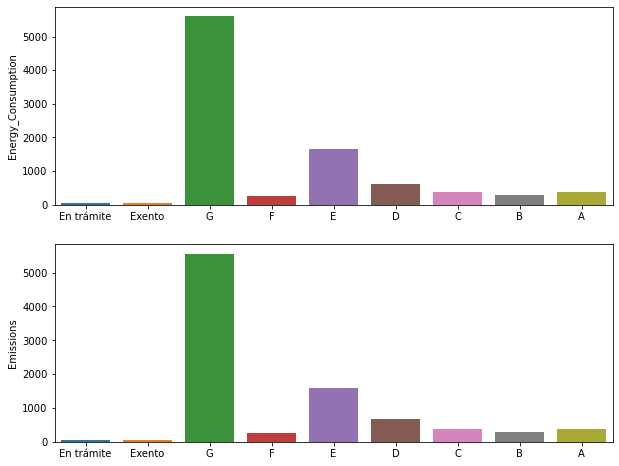

In [44]:
f, ax = plt.subplots(nrows = 2, figsize = (10,8))
sns.barplot(x = fotocasa["Energy_Consumption"].value_counts().index, 
            y = fotocasa["Energy_Consumption"].value_counts().reset_index()["Energy_Consumption"],
            order = ["En trámite", "Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[0])
sns.barplot(x = fotocasa["Emissions"].value_counts().index, 
            y = fotocasa["Emissions"].value_counts().reset_index()["Emissions"],
            order = ["En trámite", "Exento", "G", "F", "E", "D", "C", "B", "A"], ax=ax[1])

In [45]:
fotocasa["Energy_Consumption"].value_counts()/len(fotocasa)*100

G             60.599178
E             17.953710
D              6.662340
C              4.012546
A              3.969284
B              3.049968
F              2.628164
Exento         0.616483
En trámite     0.508328
Name: Energy_Consumption, dtype: float64

In [46]:
fotocasa.loc[fotocasa["Energy_Consumption"]=="En trámite","Energy_Consumption"] = np.nan

In [47]:
fotocasa = fotocasa.dropna(axis=0, subset = ["Energy_Consumption"])

In [48]:
fotocasa.isna().sum().loc[["Emissions","Energy_Consumption"]]

Emissions             0
Energy_Consumption    0
dtype: int64

# Floor

In [49]:
fotocasa["Floor"].value_counts()

1ª planta                    1133
2ª planta                    1076
3ª planta                    1007
4ª planta                     782
5ª planta                     547
Bajos                         479
6ª planta                     342
7ª planta                     193
Subsótano                      94
Sótano                         93
Entresuelo                     88
8ª planta                      80
Principal                      49
9ª planta                      39
10ª planta                     23
12ª planta                     17
11ª planta                     17
A partir de la 15ª planta      16
13ª planta                     10
14ª planta                      8
15ª planta                      7
Otro                            1
Name: Floor, dtype: int64

In [50]:
def clean_floor(x):
    try:
        return x.replace("ª planta","")
    except:
        return x

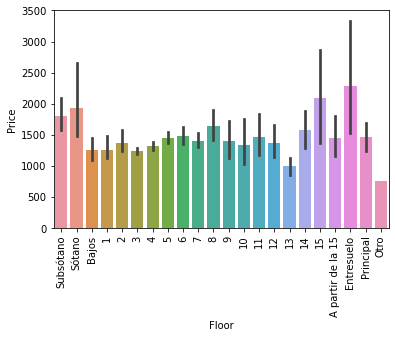

In [51]:
sns.barplot(y = fotocasa["Price"], x = fotocasa["Floor"].apply(clean_floor),
    order = ["Subsótano","Sótano","Bajos","1","2","3","4","5","6","7","8","9","10","11","12","13","14",
             "15","A partir de la 15","Entresuelo","Principal","Otro"]) 
plt.xticks(rotation=90);

In [52]:
def clean_floor(x):
    try:
        x = x.replace("ª planta","")
        if x in ["1","2","3","4"]:
            return "1-4"
        elif x in ["5","6","7","8"]:
            return "5-8"
        elif x in ["9","10","11","12"]:
            return "9-12" 
        elif x == "13":
            return "13" 
        elif x in ["14","15"]:
            return "14-15"
        elif x=="A partir de la 15":
            return "+15"
        elif x=="Subsótano":
            return "Sótano"
        elif x=="Otro":
            return np.nan
        else:
            return x
    except AttributeError:
        return x

In [53]:
fotocasa["Floor"] = fotocasa["Floor"].apply(clean_floor)

Imputing the mode does not preserve the distribution. KNN imputer will be used:

# Imputing missing values with K-neighbors classifier

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
imputer = Pipeline([('dummy',OneHotEncoder(handle_unknown = "ignore")),
                    ('knc',KNeighborsClassifier(n_neighbors = 5))])

In [55]:
cleaned_columns = list(fotocasa.isna().sum()[fotocasa.isna().sum()/len(fotocasa)*100 == 0].index)
cleaned_columns.remove("Title")
cleaned_columns.remove("Neighborhood")
cleaned_columns.remove("url")
cleaned_columns.append("Floor")
fotocasa_cleaned = fotocasa[sorted(cleaned_columns)]

In [56]:
filter_miss = fotocasa_cleaned["Floor"].isna()
# Fitting
imputer.fit(fotocasa_cleaned[~filter_miss].drop(["Floor","Price"], axis=1), 
            fotocasa_cleaned.loc[~filter_miss,"Floor"])
pd.options.mode.chained_assignment = None
fotocasa_cleaned.loc[filter_miss.values,"Floor"] = \
    imputer.predict(fotocasa_cleaned[filter_miss].drop(["Floor","Price"], axis=1))

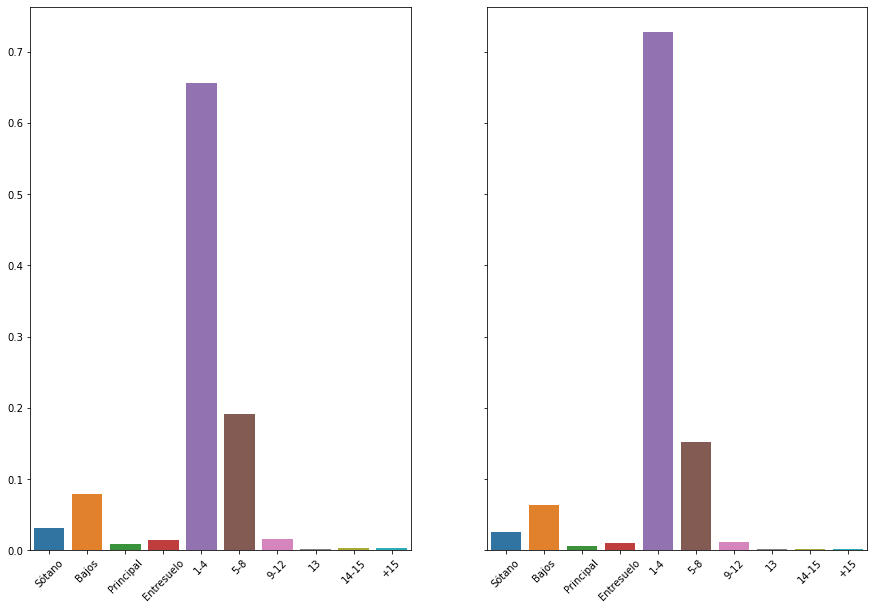

In [57]:
f, ax = plt.subplots(ncols = 2, figsize = (15,10), sharey = True)
sns.barplot(x = fotocasa["Floor"].value_counts().index,
    y = fotocasa["Floor"].value_counts().values/len(fotocasa[~fotocasa["Floor"].isna()]),
    order = ["Sótano","Bajos","Principal","Entresuelo","1-4","5-8","9-12","13","14-15","+15"],
           ax = ax[0]) 
sns.barplot(x = fotocasa_cleaned["Floor"].value_counts().index,
    y = fotocasa_cleaned["Floor"].value_counts().values/len(fotocasa_cleaned),
    order = ["Sótano","Bajos","Principal","Entresuelo","1-4","5-8","9-12","13","14-15","+15"],
           ax = ax[1]) 
for i in range(2):
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(45)

Good imputing. We observe the same shape distribution in the data withouth replacement than in the data with replacement. 

In [58]:
fotocasa_cleaned["Floor"].value_counts()

1-4           6687
5-8           1400
Bajos          588
Sótano         235
9-12           102
Entresuelo      93
Principal       50
+15             19
14-15           15
13              10
Name: Floor, dtype: int64

In [59]:
fotocasa_cleaned.to_csv("fotocasa_cleaned.csv", index=False)

Notes: Valderribas is included in Valdebernardo and Atocha in Delicias.